In [1078]:
# Import 'pandas' for working with   data frames
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#importing sklear for model train test split and scaler

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




# Import method for regression from 'statsmodels'
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


#import sklearn for RFE module for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [1079]:
# load csv
df = pd.read_csv('day.csv')

In [1080]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1081]:
df.shape

(730, 16)

In [1082]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1083]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1084]:
# drop casual and registered redundent variables
varlisttodrop = ['casual','registered']
df = df.drop(varlisttodrop,axis=1)

In [1085]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


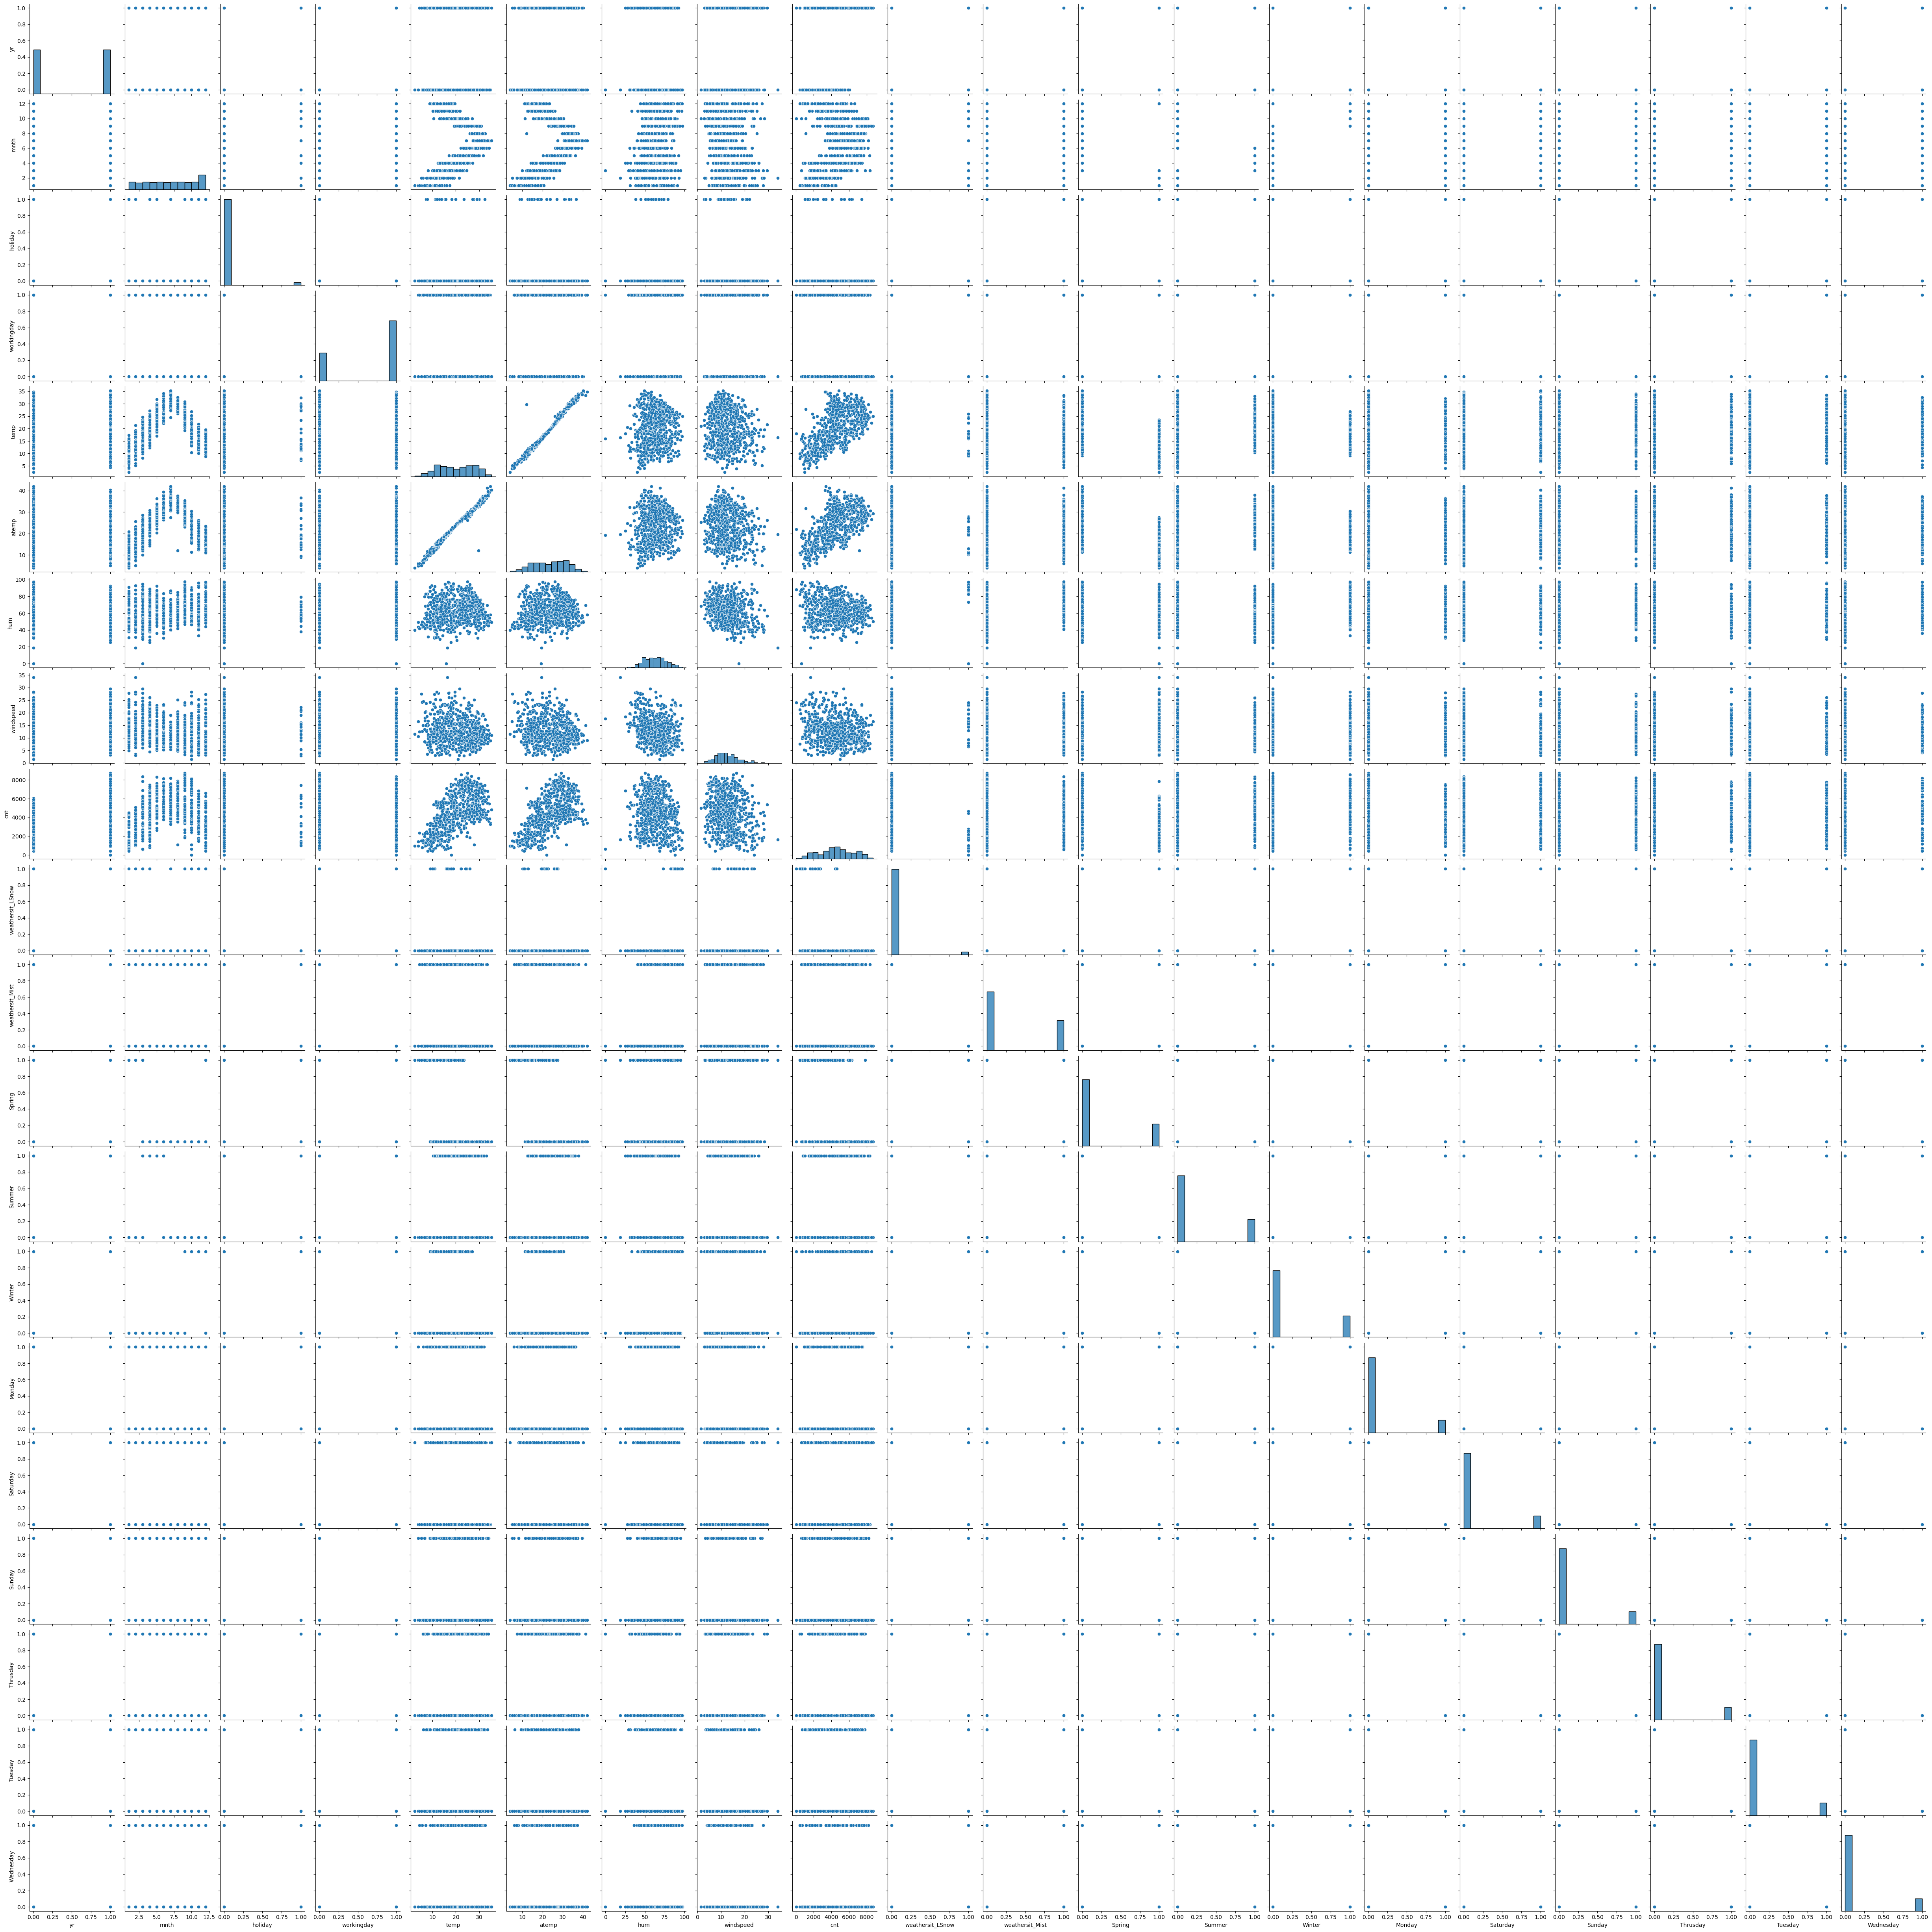

<Figure size 10000x8000 with 0 Axes>

In [1189]:
# visualising numerica variables

sns.pairplot(df)
plt.figure(figsize=(100,80))


plt.show()

ValueError: Could not interpret input 'season'

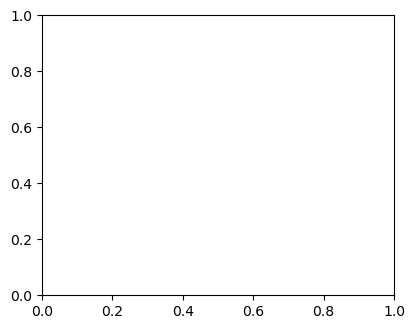

In [1191]:
# visualizing the categorical variables
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='weekday',y='cnt',data=df)


In [1088]:
#Step 2 : preparing data

df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [1089]:
df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [1090]:
#creating season map and making categories like spring summer etc.
season_map = {1:'Spring', 2:'Summer', 3:'Autumn',4:'Winter'}
df['season'] = df['season'].map(season_map)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1091]:
df.season.value_counts()

season
Autumn    188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [1092]:
#dummy variables for season and weekday

season_dummy = pd.get_dummies(df['season'],drop_first=True,dtype='int')
season_dummy


,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [1093]:
#making map for weekdays like sunday monday etc..
weekday_map = {0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'}
df['weekday'] = df['weekday'].map(weekday_map)



df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,Spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,Spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,Spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,Spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,Spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1094]:
#dummy variables for season and weekday
weekday_dummy = pd.get_dummies(df['weekday'],drop_first=True,dtype='int')
weekday_dummy.head()

,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [1095]:
#+ weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy#
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#creating map for weathersit categorical variable
weathersit_map = {1:'weathersit_Clear', 2:'weathersit_Mist', 3:'weathersit_LSnow',4:'weathersit_HRain'}
df['weathersit'] = df['weathersit'].map(weathersit_map)
#dummy variables for weathersit
weathersit_dummy = pd.get_dummies(df['weathersit'],drop_first=True,dtype='int')
weathersit_dummy.head()



,weathersit_LSnow,weathersit_Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1096]:
# concatinating the categorical variables to main dataset
df=pd.concat([df,weathersit_dummy],axis=1  )

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_LSnow,weathersit_Mist
0,1,01-01-2018,Spring,0,1,0,Saturday,0,weathersit_Mist,14.110847,18.18125,80.5833,10.749882,985,0,1
1,2,02-01-2018,Spring,0,1,0,Sunday,0,weathersit_Mist,14.902598,17.68695,69.6087,16.652113,801,0,1
2,3,03-01-2018,Spring,0,1,0,Monday,1,weathersit_Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,4,04-01-2018,Spring,0,1,0,Tuesday,1,weathersit_Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,5,05-01-2018,Spring,0,1,0,Wednesday,1,weathersit_Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [1097]:
# concatinating the categorical variables to main dataset
df=pd.concat([df,season_dummy],axis=1  )

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter
0,1,01-01-2018,Spring,0,1,0,Saturday,0,weathersit_Mist,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,2,02-01-2018,Spring,0,1,0,Sunday,0,weathersit_Mist,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,3,03-01-2018,Spring,0,1,0,Monday,1,weathersit_Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,4,04-01-2018,Spring,0,1,0,Tuesday,1,weathersit_Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,5,05-01-2018,Spring,0,1,0,Wednesday,1,weathersit_Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [1098]:
# concatinating the categorical variables to main dataset
df=pd.concat([df,weekday_dummy],axis=1  )

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,1,01-01-2018,Spring,0,1,0,Saturday,0,weathersit_Mist,14.110847,...,1,1,0,0,0,1,0,0,0,0
1,2,02-01-2018,Spring,0,1,0,Sunday,0,weathersit_Mist,14.902598,...,1,1,0,0,0,0,1,0,0,0
2,3,03-01-2018,Spring,0,1,0,Monday,1,weathersit_Clear,8.050924,...,0,1,0,0,1,0,0,0,0,0
3,4,04-01-2018,Spring,0,1,0,Tuesday,1,weathersit_Clear,8.200000,...,0,1,0,0,0,0,0,0,1,0
4,5,05-01-2018,Spring,0,1,0,Wednesday,1,weathersit_Clear,9.305237,...,0,1,0,0,0,0,0,0,0,1


In [1099]:
# after vconcatinating droping categorical variables fom main dataset and keeping dummy variables
df = df.drop('season',axis=1)
df = df.drop('weekday',axis=1)
df = df.drop('weathersit',axis=1)
df.head()

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,1,01-01-2018,0,1,0,0,14.110847,18.18125,80.5833,10.749882,...,1,1,0,0,0,1,0,0,0,0
1,2,02-01-2018,0,1,0,0,14.902598,17.68695,69.6087,16.652113,...,1,1,0,0,0,0,1,0,0,0
2,3,03-01-2018,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,0,1,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,0,1,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,0,1,0,0,0,0,0,0,0,1


In [1100]:
#train test split

In [1101]:
df_train, df_test = train_test_split (df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 22)
(220, 22)


In [1102]:
df_train.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'weathersit_LSnow',
       'weathersit_Mist', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [1103]:
df_test.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'weathersit_LSnow',
       'weathersit_Mist', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [1104]:
# using scaling technique like min max scaler
scaler = MinMaxScaler()

In [1105]:
num_vars = ['workingday','temp','atemp','hum','windspeed', 'cnt']

In [1106]:
df_train[num_vars]

,workingday,temp,atemp,hum,windspeed,cnt
576,1,29.246653,33.14480,70.4167,11.083475,7216
426,0,16.980847,20.67460,62.1250,10.792293,4066
728,0,10.489153,11.58500,48.3333,23.500518,1796
482,0,15.443347,18.87520,48.9583,8.708325,4220
111,1,13.803347,16.09770,72.9583,14.707907,1683
...,...,...,...,...,...,...
578,1,30.852500,35.35440,65.9583,8.666718,7261
53,1,9.091299,12.28585,42.3043,6.305571,1917
350,0,10.591653,12.46855,56.0833,16.292189,2739
79,1,17.647835,20.48675,73.7391,19.348461,2077


In [1107]:
# fit means learning the data set, transform will calculate min max and transform the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1108]:
df_train[num_vars].describe()

,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1109]:
#dropping the not required data
df_train = df_train.drop('dteday',axis=1)
df_train = df_train.drop('instant',axis=1)
df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,7,0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0
426,1,3,0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0,0,1,0,0,0,0
728,1,12,0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,0,1,0,0,0
482,1,4,0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,1,0,0,0,0
111,0,4,0,1.0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,1,0,0,0,0,0,0,0


In [1110]:
df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,7,0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0
426,1,3,0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0,0,1,0,0,0,0
728,1,12,0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,0,1,0,0,0
482,1,4,0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,1,0,0,0,0
111,0,4,0,1.0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,1,0,0,0,0,0,0,0


In [1111]:
#dropping the not required data
df = df.drop('dteday',axis=1)
df = df.drop('instant',axis=1)

In [1112]:
# Step 3: Training the Model

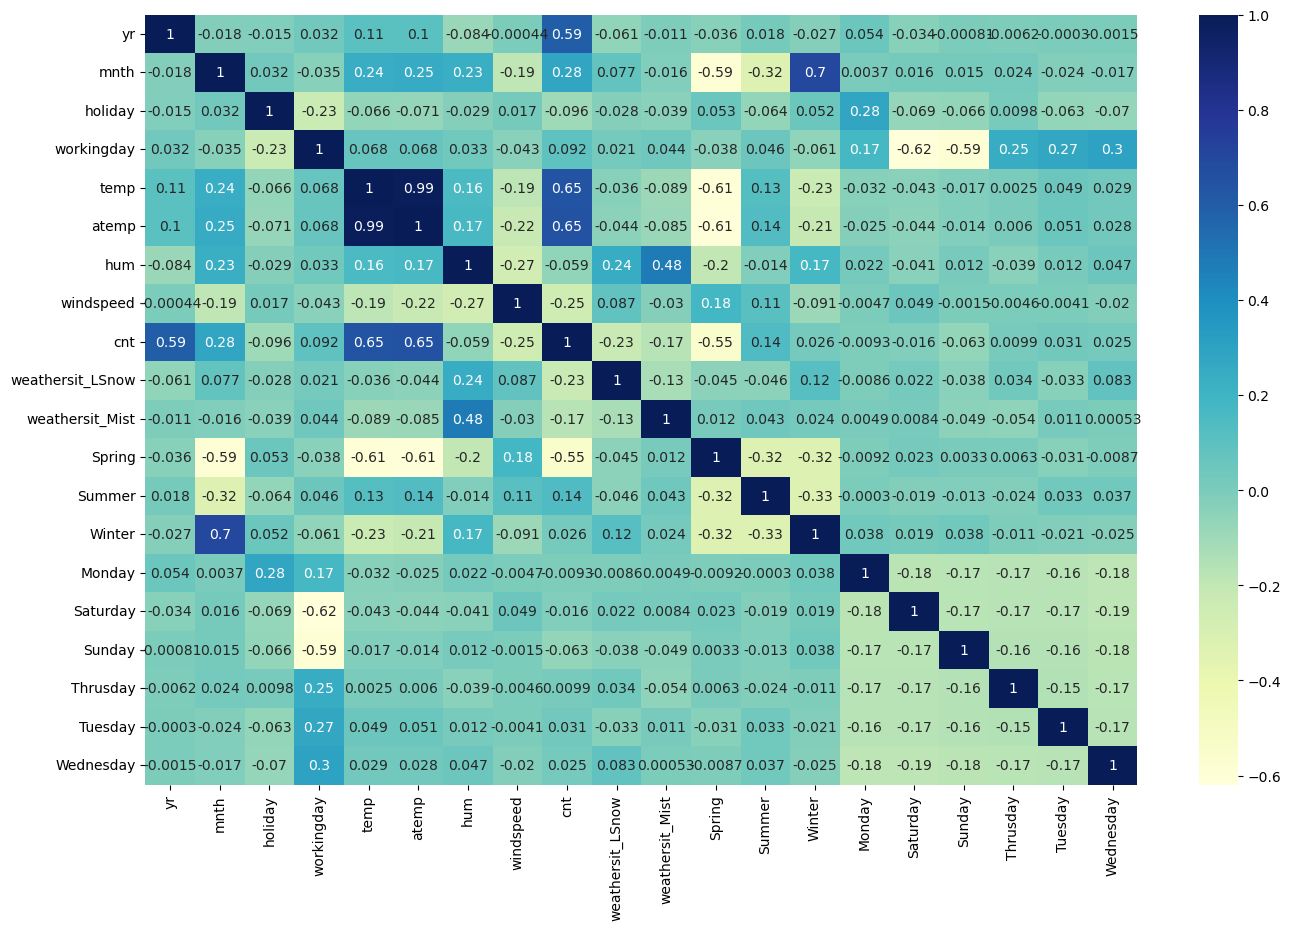

In [1113]:
# heatmap to find the corelations and selection of variables

plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [1114]:
# X_train, y_train
df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,7,0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0
426,1,3,0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0,0,1,0,0,0,0
728,1,12,0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,0,1,0,0,0
482,1,4,0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,1,0,0,0,0
111,0,4,0,1.0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,1,0,0,0,0,0,0,0


In [1115]:
#pop the cnt to genrate Y_train which is in this case y outout
y_train = df_train.pop('cnt')


In [1116]:
#other then cnt data set it to X_train dataset
X_train = df_train

In [1117]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [1118]:
#add constant

X_train_sm = sm.add_constant(X_train['windspeed'])

# create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#parmas

lr_model.params




const        0.620812
windspeed   -0.334428
dtype: float64

In [1119]:
# print the summary or the lr model, major output like R-Squared, coeficients and P value
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     34.75
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           6.83e-09
Time:                        23:21:26   Log-Likelihood:                 55.774
No. Observations:                 510   AIC:                            -107.5
Df Residuals:                     508   BIC:                            -99.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6208      0.021     30.150      0.000       0.580       0.661
windspeed     -0.3344      0.057     -5.895      0.000      -0.446      -0.223
==============================================================================
Omnibus:                       33.938   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.488
Skew:                          -0.003   Prob(JB):                      0.00194
Kurtosis:                       2.233   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1120]:
#add another variable

X_train_sm = sm.add_constant(X_train[['temp','windspeed']])

# create model using 2 variables
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


# params

lr_model.params



const        0.240854
temp         0.615443
windspeed   -0.181118
dtype: float64

In [1121]:
# print the summary of the model, major output like R-Squared, coeficients and P value lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.99e-63
Time:                        23:21:27   Log-Likelihood:                 184.13
No. Observations:                 510   AIC:                            -362.3
Df Residuals:                     507   BIC:                            -349.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2409      0.026      9.156      0.000       0.189       0.293
temp           0.6154      0.034     18.213      0.000       0.549       0.682
windspeed     -0.1811      0.045     -4.030      0.000      -0.269      -0.093
==============================================================================
Omnibus:                       10.761   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.285
Skew:                           0.155   Prob(JB):                       0.0262
Kurtosis:                       2.504   Cond. No.                         8.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1122]:
# adding the constant to the linear equation it is fitting, like y=bx+ C, where c is constant otherwise lr model does not work
X_train_sm = sm.add_constant(X_train[['temp','workingday','weathersit_LSnow','weathersit_Mist','atemp','holiday','mnth','yr','windspeed','holiday','Spring','Summer']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.21e-176
Time:                        23:21:27   Log-Likelihood:                 474.23
No. Observations:                 510   AIC:                            -924.5
Df Residuals:                     498   BIC:                            -873.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2528      0.033      7.704      0.000       0.188       0.317
temp                 0.2788      0.136      2.047      0.041       0.011       0.546
workingday           0.0172      0.009      1.825      0.069      -0.001       0.036
weathersit_LSnow    -0.2745      0.026    -10.580      0.000      -0.326      -0.224
weathersit_Mist     -0.0759      0.009     -8.285      0.000      -0.094      -0.058
atemp                0.1066      0.145      0.736      0.462      -0.178       0.391
holiday             -0.0370      0.014     -2.639      0.009      -0.065      -0.009
mnth                 0.0049      0.002      2.226      0.026       0.001       0.009
yr                   0.2362      0.009     27.350      0.000       0.219       0.253
windspeed           -0.1486      0.027     -5.510      0.000      -0.202      -0.096
holiday             -0.0370      0.014     -2.639      0.009      -0.065      -0.009
Spring              -0.1171      0.021     -5.498      0.000      -0.159      -0.075
Summer               0.0197      0.015      1.308      0.191      -0.010       0.049
==============================================================================
Omnibus:                       52.148   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.511
Skew:                          -0.520   Prob(JB):                     1.68e-29
Kurtosis:                       5.270   Cond. No.                     1.75e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1123]:
#optimized variables manually

X_train_sm = sm.add_constant(X_train[['temp','weathersit_LSnow','weathersit_Mist','holiday','mnth','yr','windspeed','Spring','Summer']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.30e-178
Time:                        23:21:27   Log-Likelihood:                 472.26
No. Observations:                 510   AIC:                            -924.5
Df Residuals:                     500   BIC:                            -882.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2667      0.032      8.309      0.000       0.204       0.330
temp                 0.3789      0.026     14.647      0.000       0.328       0.430
weathersit_LSnow    -0.2739      0.026    -10.553      0.000      -0.325      -0.223
weathersit_Mist     -0.0752      0.009     -8.201      0.000      -0.093      -0.057
holiday             -0.0862      0.027     -3.148      0.002      -0.140      -0.032
mnth                 0.0049      0.002      2.235      0.026       0.001       0.009
yr                   0.2365      0.009     27.346      0.000       0.220       0.254
windspeed           -0.1546      0.026     -5.860      0.000      -0.206      -0.103
Spring              -0.1169      0.021     -5.482      0.000      -0.159      -0.075
Summer               0.0212      0.015      1.413      0.158      -0.008       0.051
==============================================================================
Omnibus:                       54.967   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.948
Skew:                          -0.578   Prob(JB):                     1.65e-28
Kurtosis:                       5.165   Cond. No.                         76.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1124]:
df.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'weathersit_LSnow', 'weathersit_Mist', 'Spring',
       'Summer', 'Winter', 'Monday', 'Saturday', 'Sunday', 'Thrusday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [1125]:
# add all the variables

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.97e-178
Time:                        23:21:27   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -955.1
Df Residuals:                     491   BIC:                            -874.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2054      0.031      6.543      0.000       0.144       0.267
yr                   0.2320      0.008     27.573      0.000       0.215       0.249
mnth                 0.0014      0.002      0.599      0.550      -0.003       0.006
holiday              0.0025      0.024      0.104      0.917      -0.045       0.050
workingday           0.0870      0.012      7.240      0.000       0.063       0.111
temp                 0.4372      0.140      3.123      0.002       0.162       0.712
atemp                0.0581      0.143      0.406      0.685      -0.223       0.339
hum                 -0.1289      0.039     -3.301      0.001      -0.206      -0.052
windspeed           -0.1786      0.027     -6.586      0.000      -0.232      -0.125
weathersit_LSnow    -0.2483      0.027     -9.034      0.000      -0.302      -0.194
weathersit_Mist     -0.0566      0.011     -5.184      0.000      -0.078      -0.035
Spring              -0.0695      0.023     -3.001      0.003      -0.115      -0.024
Summer               0.0469      0.016      2.989      0.003       0.016       0.078
Winter               0.0831      0.019      4.435      0.000       0.046       0.120
Monday              -0.0221      0.016     -1.364      0.173      -0.054       0.010
Saturday             0.0860      0.013      6.402      0.000       0.060       0.112
Sunday               0.0299      0.014      2.144      0.033       0.002       0.057
Thrusday            -0.0086      0.016     -0.528      0.598      -0.041       0.023
Tuesday             -0.0187      0.016     -1.142      0.254      -0.051       0.013
Wednesday           -0.0031      0.016     -0.200      0.842      -0.034       0.028
==============================================================================
Omnibus:                       72.934   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.242
Skew:                          -0.729   Prob(JB):                     1.62e-40
Kurtosis:                       5.549   Cond. No.                     5.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1126]:
#sinificance (p-values)

# VIF

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

            Features    VIF
3         workingday  61.92
4               temp  58.63
5              atemp  54.10
14          Saturday  14.04
15            Sunday  13.37
10            Spring   5.80
1               mnth   3.90
12            Winter   3.84
2            holiday   3.51
11            Summer   2.69
13            Monday   1.98
18         Wednesday   1.93
6                hum   1.90
16          Thrusday   1.81
17           Tuesday   1.79
9    weathersit_Mist   1.59
8   weathersit_LSnow   1.27
7          windspeed   1.24
0                 yr   1.04


In [1127]:
# Hig P value, High VIF : DROP
# low p value , low vif : KEEP


# "working day High VIF, low P value"
# "temp is high VIF , low P value"
# " atemp high VIF , high p value " -- > can drop
# " sturday high VIF , Low p value"

# " sunday high VIF , Low p value"

#" spring has > 5 VIF, low P value"

# Month is low VIF, HIGH P value


# so try dropping workingday, temp , atemp saturday, sunday, mnth, spring 

# high P value : mnth ,atemp, Wednesday, Thrusday, holiday, , , , , Tuesday

In [1128]:
# P value is > 0.05 so dropping below items
X= X_train.drop('mnth',axis=1)
X= X.drop('atemp',axis=1)
X= X.drop('Wednesday',axis=1)


In [1129]:
X= X.drop('Thrusday',axis=1)

In [1130]:
X= X.drop('holiday',axis=1)

In [1131]:
X= X.drop('Tuesday',axis=1)

In [1132]:
# high P value : Monday, Sunday

In [1133]:
X= X.drop('Monday',axis=1)

In [1134]:
X= X.drop('Sunday',axis=1)

In [1135]:
X.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'weathersit_LSnow',
       'weathersit_Mist', 'Spring', 'Summer', 'Winter', 'Saturday'],
      dtype='object')

In [1136]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          9.49e-185
Time:                        23:21:29   Log-Likelihood:                 493.42
No. Observations:                 510   AIC:                            -962.8
Df Residuals:                     498   BIC:                            -912.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2379      0.037      6.489      0.000       0.166       0.310
yr                   0.2312      0.008     27.592      0.000       0.215       0.248
workingday           0.0534      0.011      4.718      0.000       0.031       0.076
temp                 0.4955      0.034     14.495      0.000       0.428       0.563
hum                 -0.1285      0.039     -3.318      0.001      -0.205      -0.052
windspeed           -0.1819      0.027     -6.850      0.000      -0.234      -0.130
weathersit_LSnow    -0.2475      0.027     -9.085      0.000      -0.301      -0.194
weathersit_Mist     -0.0560      0.011     -5.156      0.000      -0.077      -0.035
Spring              -0.0744      0.020     -3.631      0.000      -0.115      -0.034
Summer               0.0441      0.014      3.211      0.001       0.017       0.071
Winter               0.0882      0.017      5.244      0.000       0.055       0.121
Saturday             0.0630      0.015      4.321      0.000       0.034       0.092
==============================================================================
Omnibus:                       74.702   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.124
Skew:                          -0.726   Prob(JB):                     5.77e-44
Kurtosis:                       5.694   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1137]:
# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

            Features    VIF
3                hum  27.37
2               temp  15.64
1         workingday   4.71
4          windspeed   4.69
7             Spring   3.86
9             Winter   3.09
8             Summer   2.29
6    weathersit_Mist   2.28
0                 yr   2.08
10          Saturday   1.83
5   weathersit_LSnow   1.23


In [1138]:
# high VIF value : hum, temp, weathersit

In [1139]:
#dropping hum as it has high VIF > 5
X= X.drop('hum',axis=1)

In [1140]:
#X= X.drop('Sunday',axis=1)

In [1141]:
#X= X.drop('weathersit',axis=1)

In [1142]:
#X= X.drop('temp',axis=1)

In [1143]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.35e-183
Time:                        23:21:31   Log-Likelihood:                 487.84
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     499   BIC:                            -907.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1709      0.031      5.530      0.000       0.110       0.232
yr                   0.2343      0.008     27.864      0.000       0.218       0.251
workingday           0.0555      0.011      4.864      0.000       0.033       0.078
temp                 0.4683      0.034     13.972      0.000       0.402       0.534
windspeed           -0.1561      0.026     -6.086      0.000      -0.206      -0.106
weathersit_LSnow    -0.2833      0.025    -11.221      0.000      -0.333      -0.234
weathersit_Mist     -0.0769      0.009     -8.624      0.000      -0.094      -0.059
Spring              -0.0814      0.021     -3.959      0.000      -0.122      -0.041
Summer               0.0396      0.014      2.870      0.004       0.012       0.067
Winter               0.0769      0.017      4.621      0.000       0.044       0.110
Saturday             0.0666      0.015      4.532      0.000       0.038       0.095
==============================================================================
Omnibus:                       72.947   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.645
Skew:                          -0.716   Prob(JB):                     4.00e-42
Kurtosis:                       5.631   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1144]:
# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

           Features   VIF
2              temp  5.27
1        workingday  4.64
3         windspeed  4.64
6            Spring  2.25
0                yr  2.07
7            Summer  1.88
9          Saturday  1.83
8            Winter  1.74
5   weathersit_Mist  1.55
4  weathersit_LSnow  1.08


In [1145]:
#dropping temp as it has high VIF > 5
X= X.drop('temp',axis=1)

In [1146]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.21e-149
Time:                        23:21:31   Log-Likelihood:                 403.65
No. Observations:                 510   AIC:                            -787.3
Df Residuals:                     500   BIC:                            -745.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5476      0.018     30.749      0.000       0.513       0.583
yr                   0.2472      0.010     25.093      0.000       0.228       0.267
workingday           0.0563      0.013      4.187      0.000       0.030       0.083
windspeed           -0.1767      0.030     -5.858      0.000      -0.236      -0.117
weathersit_LSnow    -0.2950      0.030     -9.919      0.000      -0.353      -0.237
weathersit_Mist     -0.0876      0.010     -8.365      0.000      -0.108      -0.067
Spring              -0.3139      0.014    -22.026      0.000      -0.342      -0.286
Summer              -0.0575      0.014     -4.092      0.000      -0.085      -0.030
Winter              -0.0869      0.014     -6.248      0.000      -0.114      -0.060
Saturday             0.0638      0.017      3.683      0.000       0.030       0.098
==============================================================================
Omnibus:                       31.903   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.457
Skew:                          -0.344   Prob(JB):                     8.27e-16
Kurtosis:                       4.672   Cond. No.                         9.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1147]:
# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

           Features   VIF
2         windspeed  3.97
1        workingday  3.16
5            Spring  1.88
0                yr  1.87
6            Summer  1.87
7            Winter  1.69
4   weathersit_Mist  1.54
8          Saturday  1.53
3  weathersit_LSnow  1.08


In [1148]:
mycol = X.columns
mycol

Index(['yr', 'workingday', 'windspeed', 'weathersit_LSnow', 'weathersit_Mist',
       'Spring', 'Summer', 'Winter', 'Saturday'],
      dtype='object')

In [1149]:
#X= X.drop('weathersit',axis=1)

In [1150]:
#X_train_sm = sm.add_constant(X)
#lr = sm.OLS(y_train,X_train_sm)
#lr_model = lr.fit()
#lr_model.summary()

In [1151]:
# Calculate VIF for each predictor
#vif = pd.DataFrame()
#vif['Features'] = X.columns
#vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'],2)
#vif = vif.sort_values(by="VIF",ascending=False)
#print(vif)

In [1152]:
myvar = X.columns
myvar

Index(['yr', 'workingday', 'windspeed', 'weathersit_LSnow', 'weathersit_Mist',
       'Spring', 'Summer', 'Winter', 'Saturday'],
      dtype='object')

In [1153]:
#residual analysis

In [1154]:
y_train_pred = lr_model.predict(X_train_sm)

C:\Users\gaura\AppData\Local\Temp\ipykernel_12540\3911317030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

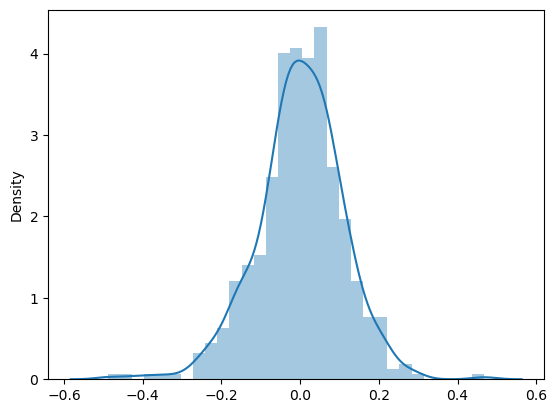

In [1155]:
res = y_train - y_train_pred
sns.distplot(res)

In [1156]:
#calculating r2 score of the training data set, and it is 0.76 which is good 
r2_score( y_true = y_train, y_pred =y_train_pred )

0.7607843194280532

In [1157]:
#num_vars = ['yr', 'workingday', 'windspeed', 'weathersit_LSnow', 'weathersit_Mist','Spring', 'Summer', 'Winter', 'Saturday','cnt']

In [1158]:
#df_test[num_vars]

In [1159]:
#df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1160]:
df_test[mycol].describe()

,yr,workingday,windspeed,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter,Saturday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.700000,12.598352,0.027273,0.318182,0.254545,0.263636,0.236364,0.118182
std,0.500809,0.459303,4.973534,0.163248,0.466833,0.436599,0.441609,0.425817,0.323559
min,0.000000,0.000000,1.500244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.031466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,12.188004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,15.385361,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,27.999836,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1161]:
df_test[mycol].info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                220 non-null    int64  
 1   workingday        220 non-null    int64  
 2   windspeed         220 non-null    float64
 3   weathersit_LSnow  220 non-null    int32  
 4   weathersit_Mist   220 non-null    int32  
 5   Spring            220 non-null    int32  
 6   Summer            220 non-null    int32  
 7   Winter            220 non-null    int32  
 8   Saturday          220 non-null    int32  
dtypes: float64(1), int32(6), int64(2)
memory usage: 12.0 KB


In [1162]:
df_test.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'weathersit_LSnow',
       'weathersit_Mist', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [1163]:
num_vars = ['workingday','temp','atemp','hum','windspeed', 'cnt']

In [1164]:
#taking test data set using vars which are fit for training data set

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,358.127273,0.481818,6.490909,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,...,0.318182,0.254545,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,214.116582,0.500809,3.422316,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,...,0.466833,0.436599,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,4.000000,0.000000,1.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.500000,0.000000,4.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,350.500000,0.000000,6.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539.750000,1.000000,9.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,730.000000,1.000000,12.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1165]:
y_test = df_test.pop('cnt')
X_test = df_test #[['windspeed','workingday','yr','Spring','Summer','Winter','Saturday']]

In [1166]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()
X_test_sm.columns

Index(['const', 'instant', 'dteday', 'yr', 'mnth', 'holiday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'weathersit_LSnow',
       'weathersit_Mist', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [1167]:
# dropping X-test data set which are not trained for the training data set and were dropped
X_test_sm = X_test_sm.drop( ['hum','instant','dteday','mnth','holiday', 'temp','atemp','Monday','Sunday','Thrusday','Tuesday','Wednesday'] ,axis=1 )



In [1168]:
X_test_sm.head()

,const,yr,workingday,windspeed,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter,Saturday
184,1.0,0,0.0,0.084219,0,1,0,0,0,0
535,1.0,1,1.0,0.153728,0,0,0,1,0,0
299,1.0,0,1.0,0.334206,0,1,0,0,1,0
221,1.0,0,1.0,0.339570,0,0,0,0,0,0
152,1.0,0,1.0,0.537414,0,0,0,1,0,0


In [1169]:
# model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.21e-149
Time:                        23:21:44   Log-Likelihood:                 403.65
No. Observations:                 510   AIC:                            -787.3
Df Residuals:                     500   BIC:                            -745.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5476      0.018     30.749      0.000       0.513       0.583
yr                   0.2472      0.010     25.093      0.000       0.228       0.267
workingday           0.0563      0.013      4.187      0.000       0.030       0.083
windspeed           -0.1767      0.030     -5.858      0.000      -0.236      -0.117
weathersit_LSnow    -0.2950      0.030     -9.919      0.000      -0.353      -0.237
weathersit_Mist     -0.0876      0.010     -8.365      0.000      -0.108      -0.067
Spring              -0.3139      0.014    -22.026      0.000      -0.342      -0.286
Summer              -0.0575      0.014     -4.092      0.000      -0.085      -0.030
Winter              -0.0869      0.014     -6.248      0.000      -0.114      -0.060
Saturday             0.0638      0.017      3.683      0.000       0.030       0.098
==============================================================================
Omnibus:                       31.903   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.457
Skew:                          -0.344   Prob(JB):                     8.27e-16
Kurtosis:                       4.672   Cond. No.                         9.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1170]:
# predict

y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.head()



184    0.445125
535    0.766447
299    0.370378
221    0.543903
152    0.451466
dtype: float64

C:\Users\gaura\AppData\Local\Temp\ipykernel_12540\3457299234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

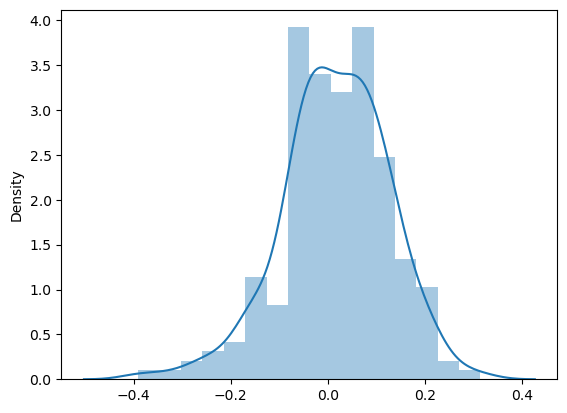

In [1171]:
#residual analysis
res = y_test - y_test_pred
sns.distplot(res)

In [1172]:
# evaluate , r2 score for test data set  is same as for trainig data set 

r2_score( y_true = y_test, y_pred =y_test_pred )

0.7442026798223604

In [1173]:
#variable selection using RFE

df.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0,0,1,0,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0,0,0,1,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,0,1,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,1


In [1174]:
#df = pd.read_csv('day.csv')

#varlisttodrop = ['casual','registered']
#df = df.drop(varlisttodrop,axis=1)

#season_map = {1:'Spring', 2:'Summer', 3:'Autumn',4:'Winter'}
#df['season'] = df['season'].map(season_map)
#season_dummy = pd.get_dummies(df['season'],drop_first=True,dtype='int')

#weekday_map = {0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'}
#df['weekday'] = df['weekday'].map(weekday_map)

#weekday_dummy = pd.get_dummies(df['weekday'],drop_first=True,dtype='int')
#df=pd.concat([df,season_dummy],axis=1  )
#df=pd.concat([df,weekday_dummy],axis=1  )

#df = df.drop('season',axis=1)
#df = df.drop('weekday',axis=1)


df_train, df_test = train_test_split (df, train_size=0.7, random_state=100)

In [1175]:
y_train = df_train.pop('cnt')
X_train = df_train

In [1176]:
df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,7,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,0,0,0,0,0,0,1,0
426,1,3,0,0,16.980847,20.6746,62.1250,10.792293,0,1,1,0,0,0,1,0,0,0,0
728,1,12,0,0,10.489153,11.5850,48.3333,23.500518,0,0,1,0,0,0,0,1,0,0,0
482,1,4,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,1,0,0,1,0,0,0,0
111,0,4,0,1,13.803347,16.0977,72.9583,14.707907,0,1,0,1,0,0,0,0,0,0,0


In [1177]:
df_test.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_LSnow,weathersit_Mist,Spring,Summer,Winter,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
184,0,7,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,0,0,1,0,0,0,0,0
535,1,6,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,1,0,0,0,0,0,0,1
299,0,10,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,1,0,0,1,0,0,0,1,0,0
221,0,8,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,1
152,0,6,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,0,1,0,0,0,0,1,0,0


In [1192]:
#variable selection using RFE
lm = LinearRegression()

In [1179]:
lm.fit(X_train,y_train)

LinearRegression()

In [1180]:
#variable selection using RFE

rfe = RFE(lm,n_features_to_select= 5)
rfe = rfe.fit(X_train,y_train)

In [1181]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 14),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', False, 9),
 ('atemp', False, 13),
 ('hum', False, 15),
 ('windspeed', False, 12),
 ('weathersit_LSnow', True, 1),
 ('weathersit_Mist', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', False, 2),
 ('Monday', False, 6),
 ('Saturday', False, 4),
 ('Sunday', False, 7),
 ('Thrusday', False, 10),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11)]

In [1182]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weathersit_LSnow', 'weathersit_Mist', 'Spring'], dtype='object')

In [1183]:
X_train_rfe = X_train[col]

In [1184]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [1185]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [1186]:
# liner regression model using automated feature selection using rfe 
# summary to check R-Squared which is 0.71 good
# features selected : yr, holiday, Low snow, Mist, Spring
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.16e-135
Time:                        23:22:11   Log-Likelihood:                -4266.7
No. Observations:                 510   AIC:                             8545.
Df Residuals:                     504   BIC:                             8571.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4353.3835     81.520  

In [1187]:

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

           Features   VIF
0             const  3.10
3  weathersit_LSnow  1.02
4   weathersit_Mist  1.02
1                yr  1.01
2           holiday  1.01
5            Spring  1.01


C:\Users\gaura\AppData\Local\Temp\ipykernel_12540\494286702.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

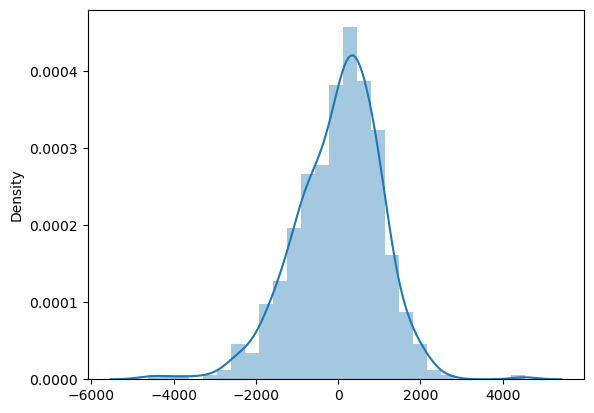

In [1188]:
y_train_rfe_pred = lm.predict(X_train_rfe)
res = y_train - y_train_rfe_pred
sns.distplot(res)

In [ ]:
# major feature selected finally 
#  weathersit_LSnow  1.02
#   weathersit_Mist  1.02
#                yr  1.01
#           holiday  1.01
#            Spring  1.01